In [1]:
# Časť 1: Data Preprocessing

# Importovanie knižníc
import numpy             as np   # NumPy je knižnica Pythonu používaná na prácu s poľami
import matplotlib.pyplot as plt  # Matplotlib je knižnica vizualizácie a grafického vykresľovania údajov pre Python, pyplot sa používa na vykreslenie 2D grafiky 
import pandas            as pd   # Pandas je knižnica Pythonu používaná na manipuláciu a analýzu údajov

In [2]:
# Importovanie training datasetu
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')   # Načítanie Training datasetu
training_set  = dataset_train.iloc[:, 1:2].values             # Pridelenie setu - všetky row, columns od 1 do 2

In [3]:
dataset_train.head()     # Kontrola výpísania dáť zo súboru (prvých 5)

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [4]:
# Škálovanie setu
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler(feature_range = (0, 1)) 
training_set_scaled = sc.fit_transform(training_set)

In [5]:
# Vytvorenie dátovej štruktúry s 60 časovými krokmi a s 1 výstupom 
X_train = []
y_train = []

for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
    
X_train, y_train = np.array(X_train), np.array(y_train)

In [6]:
# Reshaping - zmena tvaru poľa, bez zmeny údajov
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [7]:
# Časť 2: Budovanie RNN

# RNN (Recurrent Neural Network/Rekurentná Neurónová Sieť): umožňuje modelovať pamäťové jednotky tak, aby pretrvávali údaje a modelovali krátkodobé závislosti. Používa sa tiež pri predpovedi časových radov na identifikáciu korelácií a vzorov údajov.

# Importovanie Keras knižníc a balíkov
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [8]:
# Inicializácia RNN
regressor = Sequential()

# Pridanie prvej vrstvy LSTM a regularizácia Dropout
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Pridanie druhej vrstvy LSTM a regularizácia Dropout
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Pridanie tretej vrstvy LSTM a regularizácia Dropout
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Pridanie štvrtej vrstvy LSTM a regularizácia Dropout
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Pridanie výstupnej vrstvy
regressor.add(Dense(units = 1))

# Kompilácia RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [9]:
# Prispôsobenie (fit) RNN k Training setu
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
38/38 [==============================] - 11s 81ms/step - loss: 0.0700
Epoch 2/100
38/38 [==============================] - 3s 76ms/step - loss: 0.0058
Epoch 3/100
38/38 [==============================] - 3s 83ms/step - loss: 0.0055
Epoch 4/100
38/38 [==============================] - 4s 111ms/step - loss: 0.0045
Epoch 5/100
38/38 [==============================] - 5s 130ms/step - loss: 0.0053
Epoch 6/100
38/38 [==============================] - 4s 116ms/step - loss: 0.0056
Epoch 7/100
38/38 [==============================] - 5s 122ms/step - loss: 0.0046
Epoch 8/100
38/38 [==============================] - 4s 93ms/step - loss: 0.0048
Epoch 9/100
38/38 [==============================] - 3s 89ms/step - loss: 0.0047
Epoch 10/100
38/38 [==============================] - 3s 81ms/step - loss: 0.0050
Epoch 11/100
38/38 [==============================] - 3s 86ms/step - loss: 0.0046
Epoch 12/100
38/38 [==============================] - 3s 85ms/step - loss: 0.0039
Epoch 13/100
38/38 [

38/38 [==============================] - 3s 78ms/step - loss: 0.0012
Epoch 100/100
38/38 [==============================] - 3s 78ms/step - loss: 0.0013


In [10]:
# Časť 3: Tvorba predpovedí a vizualizácia výsledkov

# Importovanie test datasetu
dataset_test     = pd.read_csv('Google_Stock_Price_Test.csv')   # Načítanie test datasetu - skutočná cena akcii z roku 2017
real_stock_price = dataset_test.iloc[:, 1:2].values             # Pridelenie skutočných hodnôt - všetky row, columns od 1 do 2

In [15]:
# Získanie predpokladanej ceny akcií z roku 2017
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)

inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

X_test = []

for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

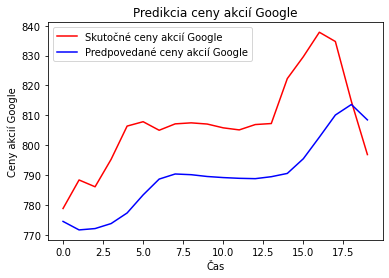

In [25]:
# Vizualizácia výsledkov
plt.plot(real_stock_price,      color = 'red' , label = 'Skutočné ceny akcií Google')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predpovedané ceny akcií Google')
plt.title('Predikcia ceny akcií Google')
plt.xlabel('Čas')
plt.ylabel('Ceny akcií Google')
plt.legend()
plt.show()